<h1 align="center">Code Cortex</h1>


<h4>Importing Required Libraries for Data Analysis</h4>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("PLANT TON_EFFICIENCY_TEMPERATURE/PLANT TON_EFFICIENCY/TableData (6).csv")
df.head(5)

,Time,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,WBT,DeltaCT,Hz_ CHP,Hz_CHS,Hz_CDS,Hz_CT,Precent_CH,Precent_ CHP,Precent_CDS,Precent_CT
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,75.6,-2.4,48,0,47,47.0,65.0,11.2,14.8,9.1
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,75.6,-2.3,48,0,47,47.0,64.1,11.5,15.2,9.3
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,75.6,-2.2,48,0,47,47.0,63.6,11.6,15.4,9.4
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,75.6,-2.0,48,0,47,47.0,63.8,11.6,15.2,9.4
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,75.6,-2.2,48,0,47,47.0,64.8,13.3,17.0,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4441 entries, 0 to 4440
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Time          4441 non-null   object 
 1   RT            4441 non-null   float64
 2   kW_Tot        4441 non-null   float64
 3   kW_RT         4441 non-null   float64
 4   CH Load       4441 non-null   float64
 5   CH1           4441 non-null   int64  
 6   CH2           4441 non-null   int64  
 7   CH3           4441 non-null   int64  
 8   CH4           4441 non-null   int64  
 9   kW_CHH        4441 non-null   float64
 10  kW_CHP        4441 non-null   float64
 11  kW_CHS        4441 non-null   int64  
 12  kW_CDS        4441 non-null   float64
 13  kW_CT         4441 non-null   float64
 14  GPM           4441 non-null   float64
 15  DeltaCHW      4441 non-null   float64
 16  CHWS          4441 non-null   float64
 17  CHWR          4441 non-null   float64
 18  DeltaCDW      4441 non-null 

In [4]:
df.head()

,Time,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,...,WBT,DeltaCT,Hz_ CHP,Hz_CHS,Hz_CDS,Hz_CT,Precent_CH,Precent_ CHP,Precent_CDS,Precent_CT
0,2023-12-01T00:00:00,201.2,208.7,1.037,39.6,0,1,0,0,135.6,...,75.6,-2.4,48,0,47,47.0,65.0,11.2,14.8,9.1
1,2023-12-01T00:10:00,180.5,203.5,1.127,38.4,0,1,0,0,130.4,...,75.6,-2.3,48,0,47,47.0,64.1,11.5,15.2,9.3
2,2023-12-01T00:20:00,170.2,200.8,1.179,37.6,0,1,0,0,127.8,...,75.6,-2.2,48,0,47,47.0,63.6,11.6,15.4,9.4
3,2023-12-01T00:30:00,184.9,201.2,1.088,37.8,0,1,0,0,128.3,...,75.6,-2.0,48,0,47,47.0,63.8,11.6,15.2,9.4
4,2023-12-01T00:40:00,176.4,181.4,1.028,34.6,0,1,0,0,117.6,...,75.6,-2.2,48,0,47,47.0,64.8,13.3,17.0,4.9


<h4>As there are no Null Values present in the dataset, we can proceed with further steps...</h4>

In [5]:
def preprocess_datetime(df, datetime_col):


    # Convert the datetime column to a pandas datetime object
    df[datetime_col] = pd.to_datetime(df[datetime_col])

    # Extract date and time components
    df['date'] = df[datetime_col].dt.date
    df['time'] = df[datetime_col].dt.time

    # Convert date to a numerical representation (e.g., ordinal)
    df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())

    # Convert time to a numerical representation (e.g., seconds since midnight)
    df['time_seconds'] = df['time'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

    # Drop the original datetime column after generating new features
    df = df.drop(datetime_col, axis=1)

    return df

In [6]:
df=preprocess_datetime(df, "Time")

In [7]:
df.head()

,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,kW_CHP,...,Hz_CDS,Hz_CT,Precent_CH,Precent_ CHP,Precent_CDS,Precent_CT,date,time,date_ordinal,time_seconds
0,201.2,208.7,1.037,39.6,0,1,0,0,135.6,23.3,...,47,47.0,65.0,11.2,14.8,9.1,2023-12-01,00:00:00,738855,0
1,180.5,203.5,1.127,38.4,0,1,0,0,130.4,23.3,...,47,47.0,64.1,11.5,15.2,9.3,2023-12-01,00:10:00,738855,600
2,170.2,200.8,1.179,37.6,0,1,0,0,127.8,23.3,...,47,47.0,63.6,11.6,15.4,9.4,2023-12-01,00:20:00,738855,1200
3,184.9,201.2,1.088,37.8,0,1,0,0,128.3,23.3,...,47,47.0,63.8,11.6,15.2,9.4,2023-12-01,00:30:00,738855,1800
4,176.4,181.4,1.028,34.6,0,1,0,0,117.6,24.1,...,47,47.0,64.8,13.3,17.0,4.9,2023-12-01,00:40:00,738855,2400


In [8]:
def preprocess_date(df, date_col):


    # Convert the date column to a pandas datetime object
    df[date_col] = pd.to_datetime(df[date_col])

    # Extract year, month, and day
    df['year'] = df[date_col].dt.year
    df['month'] = df[date_col].dt.month
    df['day'] = df[date_col].dt.day

    # Extract day of week (as a numerical value)
    df['day_of_week'] = df[date_col].dt.dayofweek

    # Extract day of year
    df['day_of_year'] = df[date_col].dt.dayofyear

    df = df.drop(date_col, axis=1)
    return df

In [9]:
df=preprocess_date(df, "date")

In [10]:
df.head()

,RT,kW_Tot,kW_RT,CH Load,CH1,CH2,CH3,CH4,kW_CHH,kW_CHP,...,Precent_CDS,Precent_CT,time,date_ordinal,time_seconds,year,month,day,day_of_week,day_of_year
0,201.2,208.7,1.037,39.6,0,1,0,0,135.6,23.3,...,14.8,9.1,00:00:00,738855,0,2023,12,1,4,335
1,180.5,203.5,1.127,38.4,0,1,0,0,130.4,23.3,...,15.2,9.3,00:10:00,738855,600,2023,12,1,4,335
2,170.2,200.8,1.179,37.6,0,1,0,0,127.8,23.3,...,15.4,9.4,00:20:00,738855,1200,2023,12,1,4,335
3,184.9,201.2,1.088,37.8,0,1,0,0,128.3,23.3,...,15.2,9.4,00:30:00,738855,1800,2023,12,1,4,335
4,176.4,181.4,1.028,34.6,0,1,0,0,117.6,24.1,...,17.0,4.9,00:40:00,738855,2400,2023,12,1,4,335


In [11]:
df=df.drop(["CH1","CH2","CH3","CH4"], axis=1)

In [12]:
df.head()

,RT,kW_Tot,kW_RT,CH Load,kW_CHH,kW_CHP,kW_CHS,kW_CDS,kW_CT,GPM,...,Precent_CDS,Precent_CT,time,date_ordinal,time_seconds,year,month,day,day_of_week,day_of_year
0,201.2,208.7,1.037,39.6,135.6,23.3,0,30.9,18.9,1238.0,...,14.8,9.1,00:00:00,738855,0,2023,12,1,4,335
1,180.5,203.5,1.127,38.4,130.4,23.3,0,30.9,18.9,1238.0,...,15.2,9.3,00:10:00,738855,600,2023,12,1,4,335
2,170.2,200.8,1.179,37.6,127.8,23.3,0,30.9,18.9,1238.0,...,15.4,9.4,00:20:00,738855,1200,2023,12,1,4,335
3,184.9,201.2,1.088,37.8,128.3,23.3,0,30.6,18.9,1233.0,...,15.2,9.4,00:30:00,738855,1800,2023,12,1,4,335
4,176.4,181.4,1.028,34.6,117.6,24.1,0,30.8,8.9,1282.8,...,17.0,4.9,00:40:00,738855,2400,2023,12,1,4,335


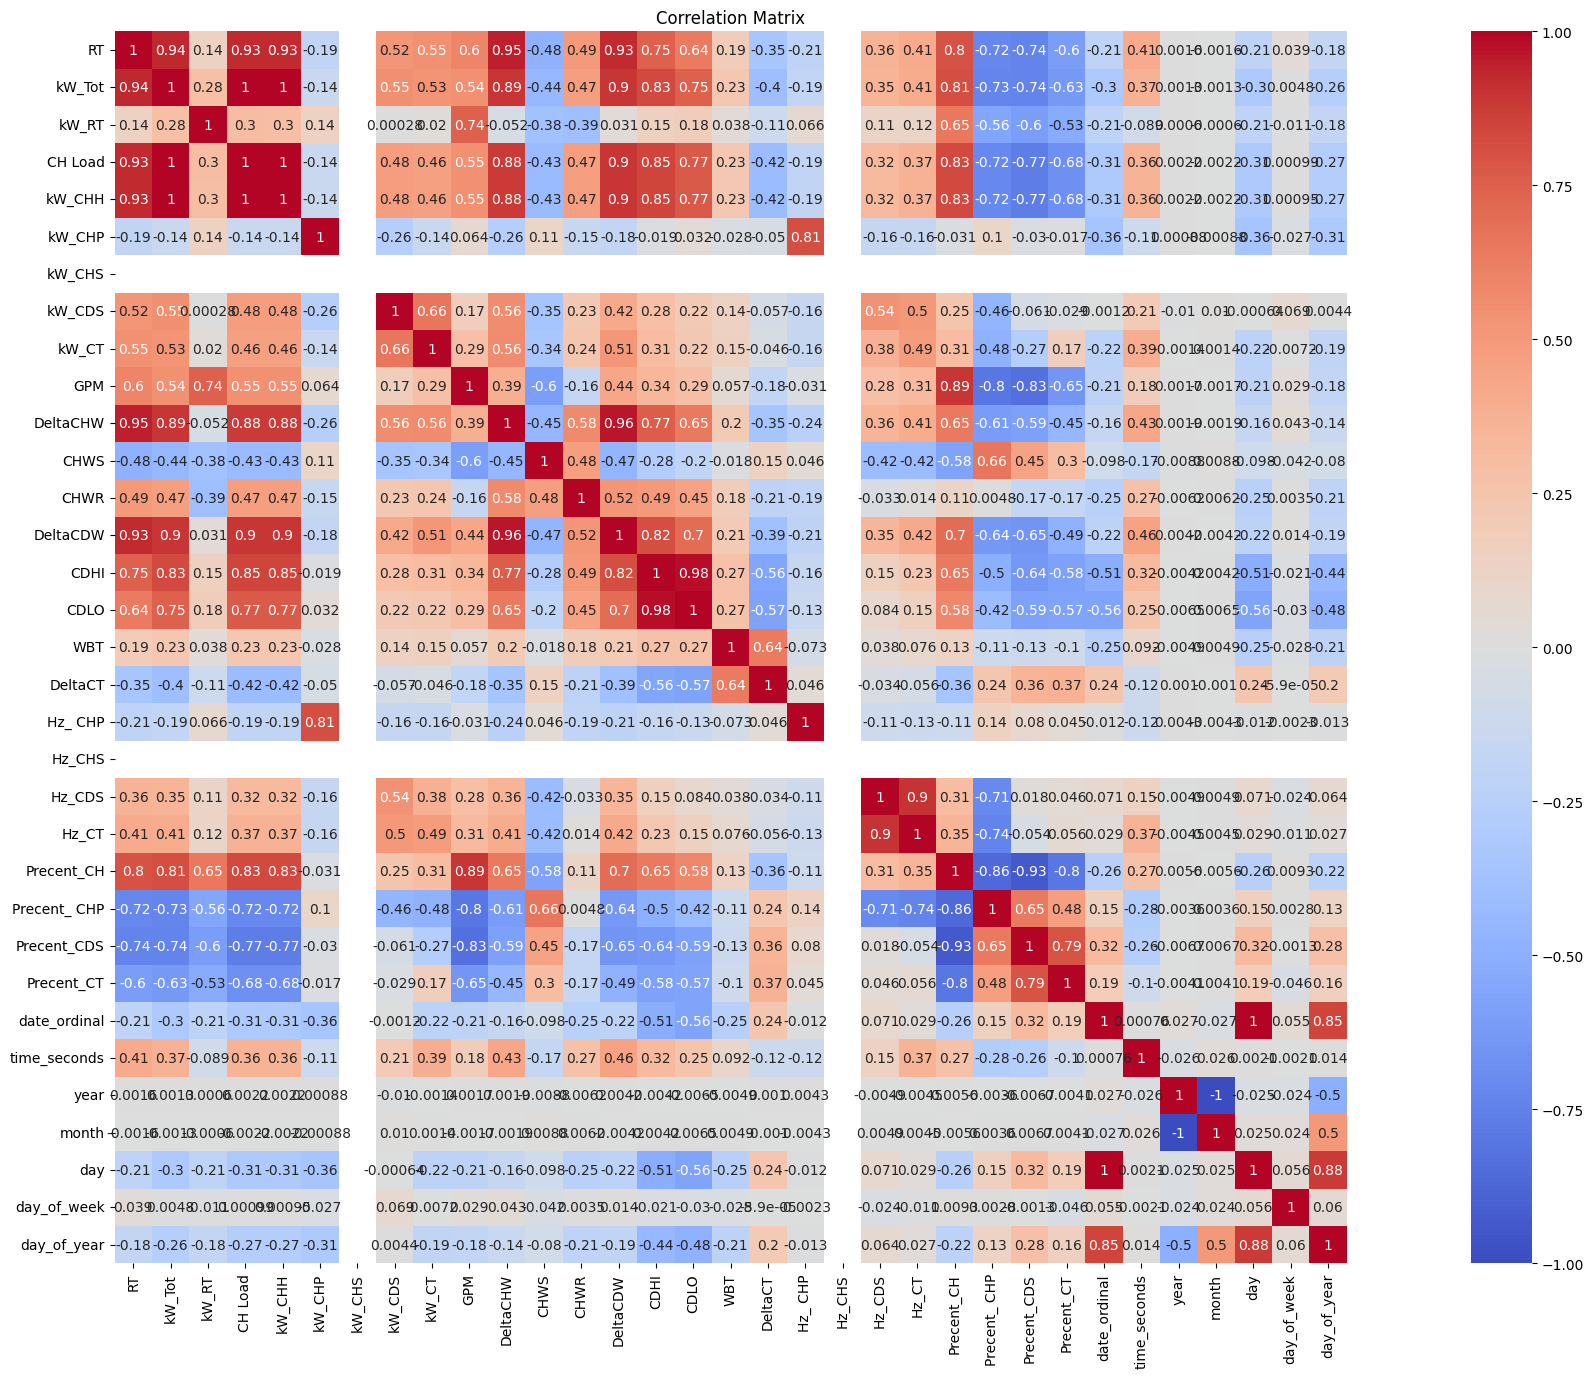

In [13]:
corr_matrix = df.drop("time",axis=1).corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(32, 16))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
Target=pd.DataFrame(df["CH Load"])
Data=df.drop(["CH Load","time"],axis=1)


In [16]:
X_train, X_test, Y_train, Y_test=train_test_split(Data,Target,test_size=0.3)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

def train_models(X_train, X_test, y_train, y_test):

    # Train Linear Regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred_lr = lr_model.predict(X_test)
    print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lr))

    # Visualize Linear Regression model
    plt.scatter(y_test, y_pred_lr)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Linear Regression")
    plt.show()

    # Train Random Forest model
    rf_model = RandomForestRegressor()
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rf))

    # Visualize Random Forest model
    plt.scatter(y_test, y_pred_rf)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Random Forest")
    plt.show()

    # Train Gradient Boost model
    gb_model = GradientBoostingRegressor()
    gb_model.fit(X_train, y_train)
    y_pred_gb = gb_model.predict(X_test)
    print("Gradient Boost MSE:", mean_squared_error(y_test, y_pred_gb))

    # Visualize Gradient Boost model
    plt.scatter(y_test, y_pred_gb)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Gradient Boost")
    plt.show()

    # Train Decision Tree model
    dt_model = DecisionTreeRegressor()
    dt_model.fit(X_train, y_train)
    y_pred_dt = dt_model.predict(X_test)
    print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

    # Visualize Decision Tree model
    plt.scatter(y_test, y_pred_dt)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Decision Tree")
    plt.show()

Linear Regression MSE: 0.01077230261039303


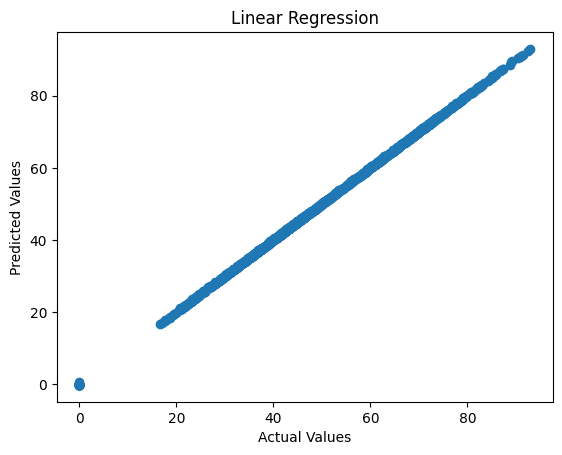

C:\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 0.015724755438859317


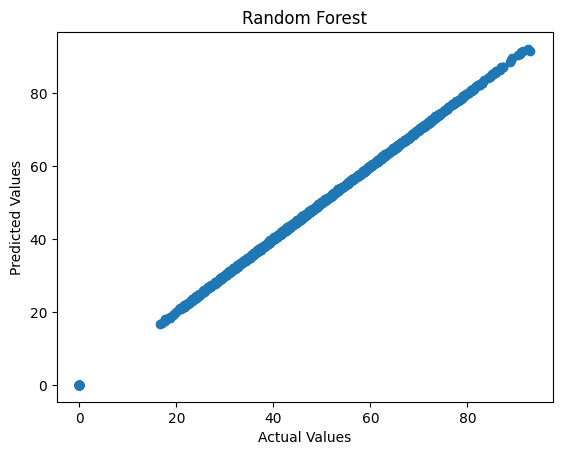

C:\Python312\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Gradient Boost MSE: 0.040943961706338294


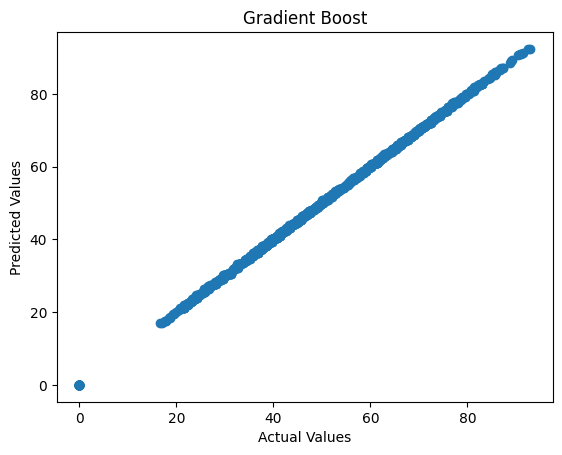

Decision Tree MSE: 0.0241635408852213


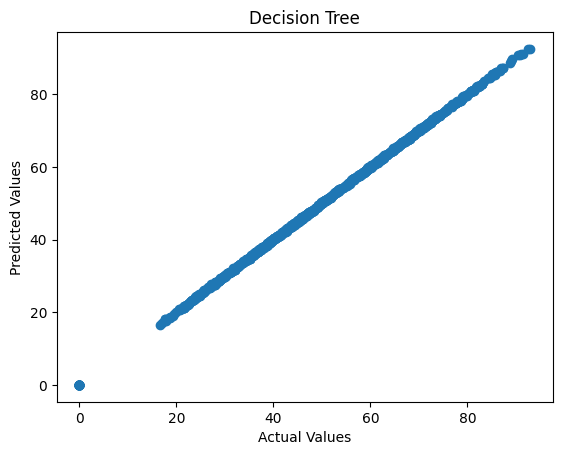

In [18]:
train_models(X_train, X_test, Y_train, Y_test)


In [19]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
y_pred_lr = lr_model.predict(X_test)
print("Linear Regression MSE:", mean_squared_error(Y_test, y_pred_lr))

Linear Regression MSE: 0.01077230261039303


In [20]:
X_test.to_csv("Test_csv.csv",index=False)

In [21]:
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)